(90.34923669695854, 16.41049399971962)

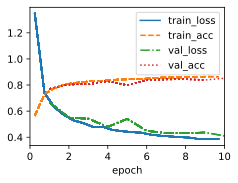

In [1]:
import sys
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import warnings
import matplotlib.pyplot as plt
import cProfile
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings("ignore")

def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens)*sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs)*sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))
        
    def forward(self, X):
        X = X.reshape(-1, self.num_inputs)
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2
    
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

(88.42640492320061, 17.865788638591766)

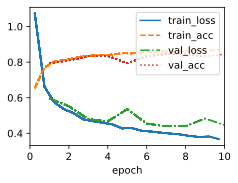

In [3]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))
        
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# 1. Change the number of hidden units num_hiddens and plot how its number affects the accuracy of the model. What is the best value of this hyperparameter?

In [18]:
def stat_acc(num_hiddens):
    model = MLP(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer = d2l.Trainer(max_epochs=10, plot_flag=False)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32))
    return model.accuracy(y_hat,data.val.targets).item()

hiddens = d2l.gen_logrithm_nums(initial_value = 64, growth_factor = 2, num_elements = 5)
accs = [stat_acc(num_hiddens) for num_hiddens in hiddens]

In [ ]:
d2l.plot(hiddens,accs,'num_hiddens','acc')

# 2. Try adding a hidden layer to see how it affects the results.

In [ ]:
class TwoMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super.__init__()

# 3. Why is it a bad idea to insert a hidden layer with a single neuron? What could go wrong?



# 4. How does changing the learning rate alter your results? With all other parameters fixed, which learning rate gives you the best results? How does this relate to the number of epochs?



# 5. Let’s optimize over all hyperparameters jointly, i.e., learning rate, number of epochs, number of hidden layers, and number of hidden units per layer.
- What is the best result you can get by optimizing over all of them?
- Why it is much more challenging to deal with multiple hyperparameters?
- Describe an efficient strategy for optimizing over multiple parameters jointly.

# 6. Compare the speed of the framework and the from-scratch implementation for a challenging problem. How does it change with the complexity of the network?




# 7. Measure the speed of tensor–matrix multiplications for well-aligned and misaligned matrices. For instance, test for matrices with dimension 1024, 1025, 1026, 1028, and 1032.
- How does this change between GPUs and CPUs?
- Determine the memory bus width of your CPU and GPU.

# 8. Try out different activation functions. Which one works best?




# Is there a difference between weight initializations of the network? Does it matter?
